In [2]:
#SPARK FOUNDATION INTERNSHIP:-TASK-4
#NAME:NISARG PATEL

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


In [3]:
data=pd.read_csv(r'C:\Users\Nisarg Patoliya\Downloads\Iris.csv')
data=data.drop('Id',axis=1)

In [4]:
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


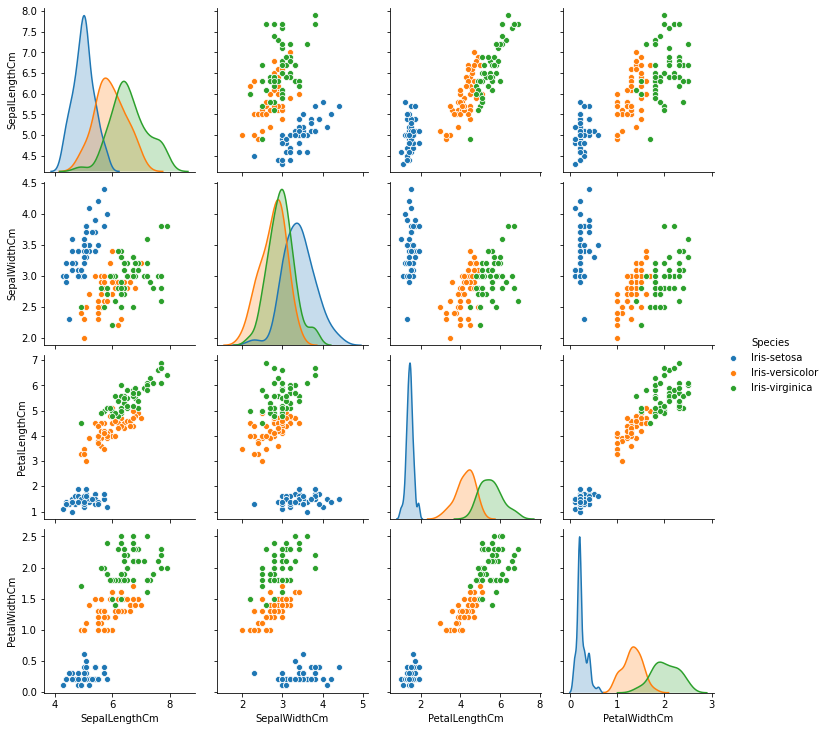

In [5]:
sns.pairplot(data,hue='Species')

In [6]:
target=data['Species']
data=data.drop('Species',axis=1)

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
target.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

x,x_test,y,y_test =train_test_split(data,target,test_size=0.2,random_state=42)

In [12]:
x_train,x_valid,y_train,y_valid =train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train_auc = []
cv_auc = []
max_depths =[1,5,10,50]
min_samples_splits = [5,10,100,500]
for i in tqdm(max_depths):
    p=[]
    q=[]
    for j in tqdm(min_samples_splits):
        clf =  DecisionTreeClassifier(max_depth=i,min_samples_split=j)
        clf.fit(x_train, y_train)
        y_train_pred = clf.predict(x_train)    
        y_cv_pred = clf.predict(x_valid) 
        p.append(accuracy_score(y_train,y_train_pred))
        q.append(accuracy_score(y_valid, y_cv_pred))
    train_auc.append(p)
    cv_auc.append(q)


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 142.88it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 142.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 24.40it/s]


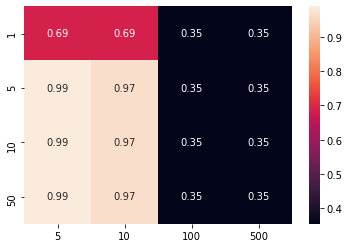

In [14]:
sns.heatmap(train_auc,annot=True,fmt='.2f',yticklabels=['1','5','10','50'],xticklabels=['5','10','100','500'])

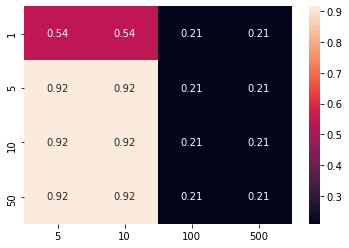

In [15]:
sns.heatmap(cv_auc,annot=True,fmt='.2f',yticklabels=['1','5','10','50'],xticklabels=['5','10','100','500'])


In [16]:
best_model =  DecisionTreeClassifier(max_depth=5,min_samples_split=5)

In [17]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
from sklearn.metrics import confusion_matrix

y_predict=best_model.predict(x_train)
con=confusion_matrix(y_train,y_predict)

In [19]:
df=pd.DataFrame(data=con,index=['Iris-setosa','Iris-virginica','Iris-versicolor'],columns=['Iris-setosa','Iris-virginica','Iris-versicolor'])

Text(33.0, 0.5, 'actual value')

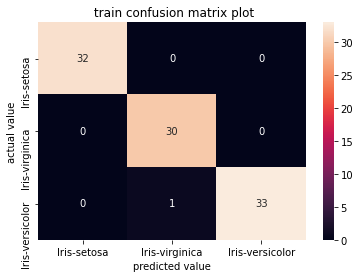

In [20]:
import seaborn as sns
sns.heatmap(df,fmt='d',annot=True)
plt.title(' train confusion matrix plot')
plt.xlabel('predicted value')
plt.ylabel('actual value')


Text(33.0, 0.5, 'actual value')

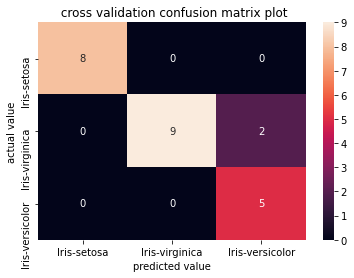

In [21]:
y_predict=best_model.predict(x_valid)
con=confusion_matrix(y_valid,y_predict)

df=pd.DataFrame(data=con,index=['Iris-setosa','Iris-virginica','Iris-versicolor'],columns=['Iris-setosa','Iris-virginica','Iris-versicolor'])


import seaborn as sns
sns.heatmap(df,fmt='d',annot=True)
plt.title(' cross validation confusion matrix plot')
plt.xlabel('predicted value')
plt.ylabel('actual value')

Text(33.0, 0.5, 'actual value')

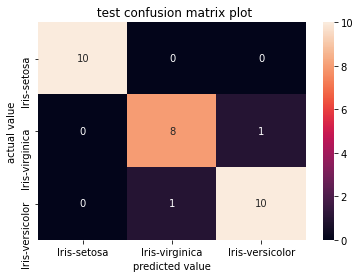

In [22]:
y_predict=best_model.predict(x_test)
con=confusion_matrix(y_test,y_predict)

df=pd.DataFrame(data=con,index=['Iris-setosa','Iris-virginica','Iris-versicolor'],columns=['Iris-setosa','Iris-virginica','Iris-versicolor'])


import seaborn as sns
sns.heatmap(df,fmt='d',annot=True)
plt.title(' test confusion matrix plot')
plt.xlabel('predicted value')
plt.ylabel('actual value')

In [23]:
accuracy=accuracy_score(y_test,y_predict)
print('test accuarcy of iris dataset--->>> '+str(accuracy))


test accuarcy of iris dataset--->>> 0.9333333333333333


In [24]:
data.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus


In [28]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [51]:
clf = DecisionTreeClassifier()
df1=pd.DataFrame(iris.data, columns=iris.feature_names)
# Train model
model = clf.fit(df1, y)


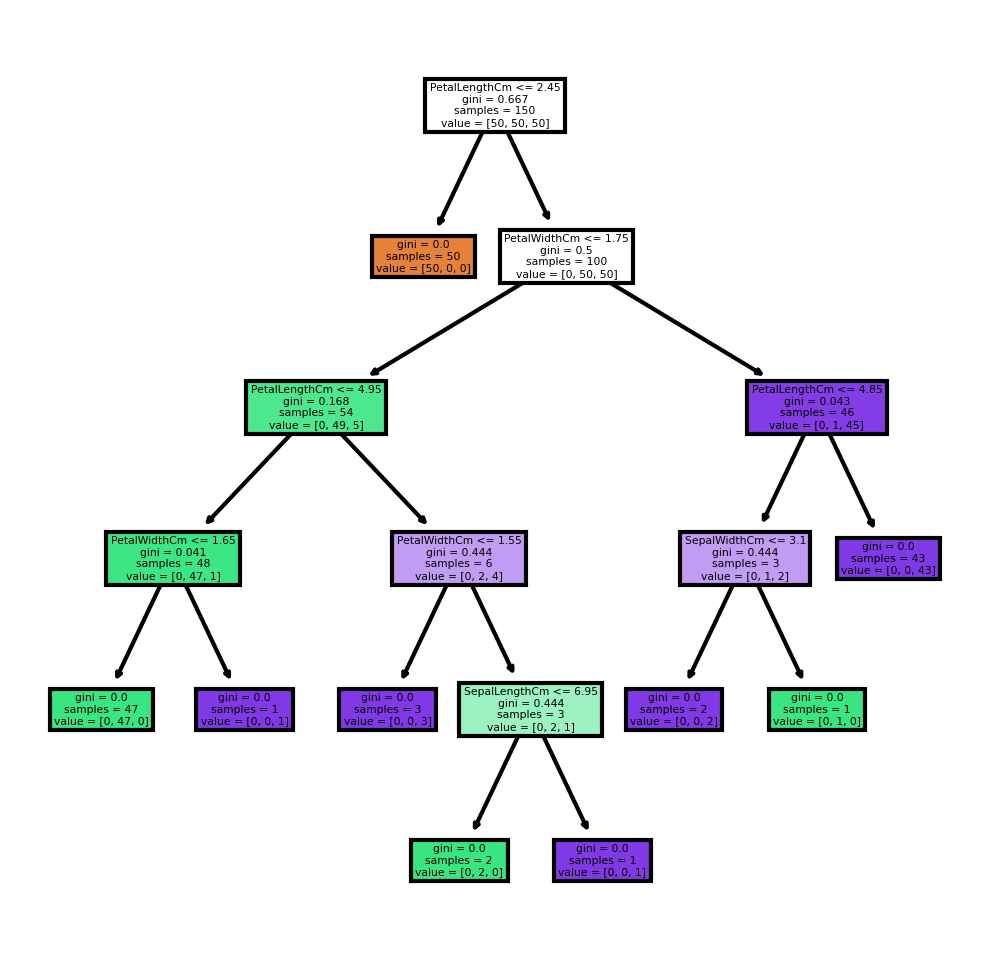

In [52]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               filled = True);
fig.savefig('imagename.png')

tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn,
                     filled = True)
